## AMSC 661, Homework 4 
#### Dominic Flocco, March 1, 2023

In [ ]:
# Stiff Robertson's problem from chemical kinetics as in
# https://openmdao.github.io/dymos/examples/robertson_problem/robertson_problem.html
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
# The following notebook was adapted from Professor Cameron's provided code

a = 0.04
b = 1.0e4
c = 3.0e7

# coefficients fo BDF2:
# u_{n+1} + alpha_0*u_n + alpha_1*u_{n-1} = h*beta_{-1}f_{n+1}
bm1 = 2/3 # beta_{-1}
a0 = -4/3 # alpha_0
a1 = 1/3 # alpha_1

# timestep, Tmax, tolearnce for Newton's solver
h = 0.001
Tmax = 40.0
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20

# the right-hand side
def func(y): 
    dy = np.zeros(3)
    byz = b*y[1]*y[2]
    cy2 = c*y[1]*y[1]
    ax = a*y[0]
    dy[0] = -ax + byz
    dy[1] = ax - byz - cy2
    dy[2] = cy2
    return dy

# the Jacobian matrix for the right-hand side
def Jac(y):
    by = b*y[1]
    bz = b*y[2]
    c2y = 2*c*y[1]
    Jac = np.zeros((3,3))
    Jac[0,0] = -a
    Jac[0,1] = bz
    Jac[0,2] = by
    Jac[1,0] = a
    Jac[1,1] = -bz-c2y
    Jac[1,2] = -by
    Jac[2,1] = c2y
    return Jac

y0 = np.array([1.0,0.0,0.0])

def NewtonIterBDF(y,yn,yn1,h):
    # yn = y(t_n)
    # yn1 = y(t_{n-1})
    F = y - bm1*h*func(y) + a0*yn + a1*yn1
    DF = np.identity(3) - bm1*h*Jac(y)
    return y - np.linalg.solve(DF,F)

gamma = 1.0 - 1.0/np.sqrt(2)

def NewtonIterDIRK2_k1(y,h,k1):
    aux = y + h*gamma*k1
    F = k1 - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k1 - np.linalg.solve(DF,F)

def NewtonIterDIRK2_k2(y,h,k1,k2):
    aux = y + h*((1-gamma)*k1 + gamma*k2)
    F = k2 - func(aux)
    DF = np.identity(3) - h*gamma*Jac(aux)
    return k2 - np.linalg.solve(DF,F)

def DIRK2step(y,h):
    k1 = func(y)
    for j in range(itermax):
        k1 = NewtonIterDIRK2_k1(y,h,k1)
        if np.linalg.norm(k1 - func(y + h*gamma*k1)) < tol:
            break
    # print( np.linalg.norm(k1 - func(y + h*gamma*k1)))
    # print(j)
    k2 = k1
    for j in range(itermax):
        k2 = NewtonIterDIRK2_k2(y,h,k1,k2)
        aux = y + h*((1-gamma)*k1 + gamma*k2)
        if np.linalg.norm(k2 - func(aux)) < tol:
            break
    # print( np.linalg.norm(k2 - func(aux)))
    # print(j)
    return aux
    

In [23]:
sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0
sol[1,:] = DIRK2step(y0,h)
#print(sol[0:2,:])
tic = time.time()
for j in range(1,Nsteps):
    sol[j+1,:] = DIRK2step(sol[j,:],h)

toc = time.time() - tic
print(f"DIRK2 Runtime: {toc}")
    
    

DIRK2 Runtime: 11.806323051452637


Text(0, 0.5, 't')

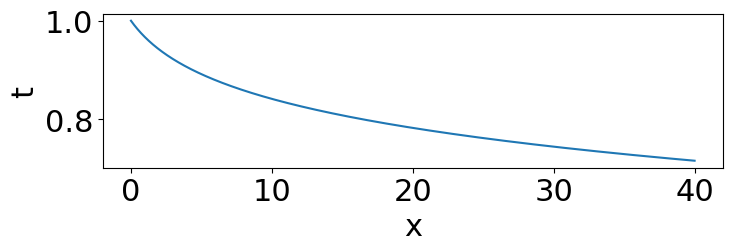

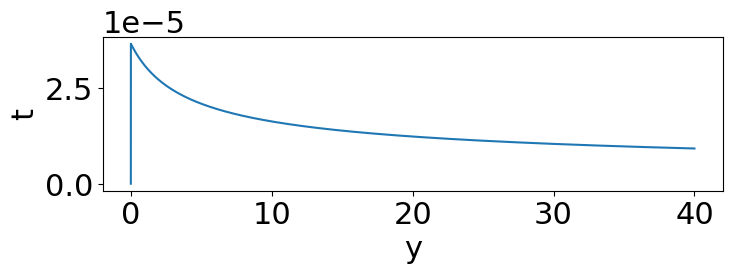

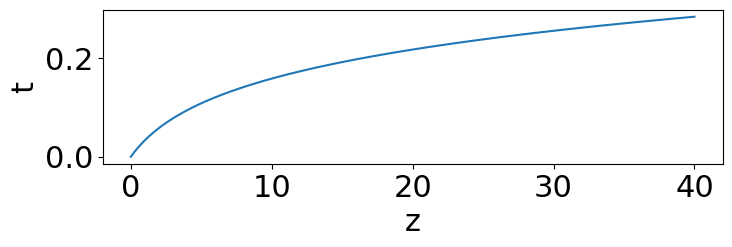

In [24]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,0])
plt.xlabel("x")
plt.ylabel("t")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,1])
plt.xlabel("y")
plt.ylabel("t")
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,sol[:,2])
plt.xlabel("z")
plt.ylabel("t")


The 2-step BDF method with a variable timstep is given by $$u_{n+1} - \frac{(1+\omega)^2}{1+2\omega} u_n + \frac{\omega ^2}{1+ 2\omega} u_{n-1} = h_n \frac{1+ \omega}{1+2\omega}f(t_{n+1}, u_{n+1}), $$
where $h_n := t_{n+1} - t_n$, $\omega = h_n/h_{n-1}$. With a constant timestep, we set $h_n = h_{n-1} = h_{n+1} = h$ and obtain 
$$u_{n+1} - \frac{4}{3}u_n + \frac{1}{3} u_{n-1} = \frac{2}{3}h f(t_{n+1}, y_{n+1}).$$

BDF2 Runtime: 7.322479009628296 secs


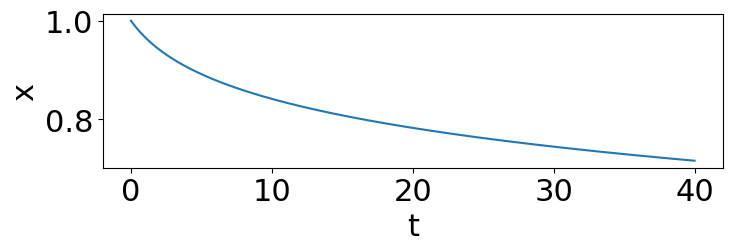

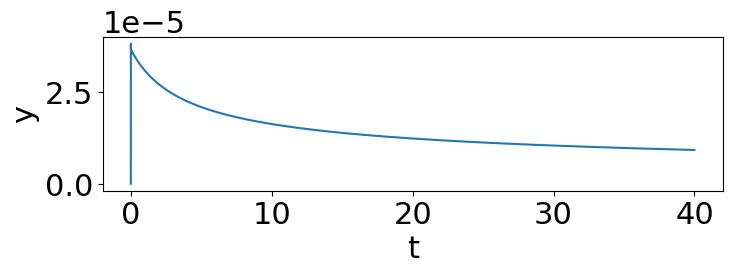

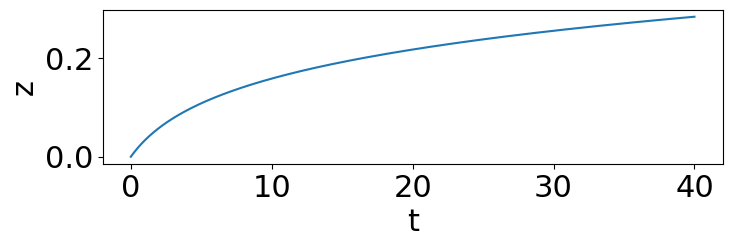

In [25]:
h = 0.001
Tmax = 40.0
Nsteps = int(np.ceil(Tmax/h))
tol = 1.0e-14
itermax = 20

bm1 = 2/3 # beta_{-1}
a0 = -4/3 # alpha_0
a1 = 1/3 # alpha_1

y0 = np.array([1.0,0.0,0.0])

sol = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
sol[0,:] = y0
sol[1,:] = DIRK2step(y0,h)

def NewtonIterBDF(y,yn,yn1,h):
    # yn = y(t_n)
    # yn1 = y(t_{n-1})
    F = y - bm1*h*func(y) + a0*yn + a1*yn1
    DF = np.identity(3) - bm1*h*Jac(y)
    return y - np.linalg.solve(DF,F)

def BDF2step(yn,yn1,h):
    y = yn
    for j in range(itermax):
        y = NewtonIterBDF(y,yn,yn1,h)
        norm = np.linalg.norm(y - bm1*h*func(y) + a0*yn + a1*yn1)
        if  norm < tol:
            break
    return y

u = np.zeros((Nsteps+1,3))
t = np.arange(0,(Nsteps+1)*h,h)
u[0,:] = y0
u[1,:] = DIRK2step(y0,h)

tic = time.time()
for j in range(1,Nsteps):
    u[j+1,:] = BDF2step(u[j,:],u[j-1,:], h)
toc = time.time() - tic

print(f"BDF2 Runtime: {toc} secs")
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,u[:,0])
plt.xlabel("t")
plt.ylabel("x")

fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,u[:,1])
plt.xlabel("t")
plt.ylabel("y")

fig, ax = plt.subplots(figsize = (8,2))
plt.plot(t,u[:,2])
plt.xlabel("t")
plt.ylabel("z")

plt.show()